In [1]:
%%capture
## compile PyStokes for this notebook
import os
owd = os.getcwd()
os.chdir('../')
%run setup.py install
os.chdir(owd)

In [2]:
%matplotlib inline
import pystokes 
import numpy as np, matplotlib.pyplot as plt

In [3]:
# particle radius, self-propulsion speed, number and fluid viscosity
b, vs, Np, eta = 1.0, 1.0, 128, 0.1

#initialise
r = pystokes.utils.initialCondition(Np)  # initial random distribution of positions
p = np.zeros(3*Np); p[2*Np:3*Np] = -1    # initial orientation of the colloids

In [4]:
def rhs(rp):
    """
    right hand side of the rigid body motion equation
    rp: is the array of position and orientations of the colloids
    returns the \dot{rp} so that rp can be updated using an integrator
    orientations are not evolved in this example
    """
    # assign fresh values at each time step
    r = rp[0:3*Np];   p = rp[3*Np:6*Np]
    F, v, o = np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np)
    
    force.lennardJonesWall(F, r, lje=0.01, ljr=5, wlje=1.2, wljr=3.4)
    rbm.mobilityTT(v, r, F)    
    
    V1s = vs*p;  V3t=0.6*V1s;
    rbm.propulsionT3t(v, r, V3t);    v = v + V1s
    return np.concatenate( (v,o) )

## Crystallization at plane no-slip wall

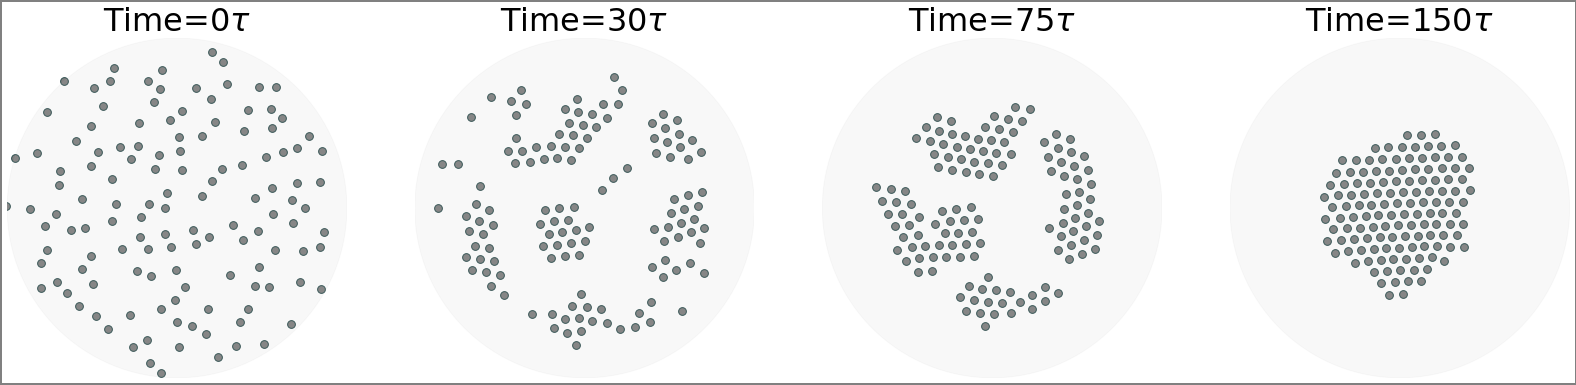

In [5]:
rbm   = pystokes.wallBounded.Rbm(radius=b, particles=Np, viscosity=eta)
force = pystokes.forceFields.Forces(particles=Np)

# simulate the resulting system
Tf, Npts = 150, 200
pystokes.utils.simulate(np.concatenate((r,p)), Tf,Npts,rhs,integrator='odeint', filename='crystallization')

# plot the data at specific time instants
pystokes.utils.plotConfigs(t=[1, 40, 100, 200], ms=60, tau=(Tf/Npts)/(b/vs), filename='crystallization')

## Crystallization at plane no-shear interface

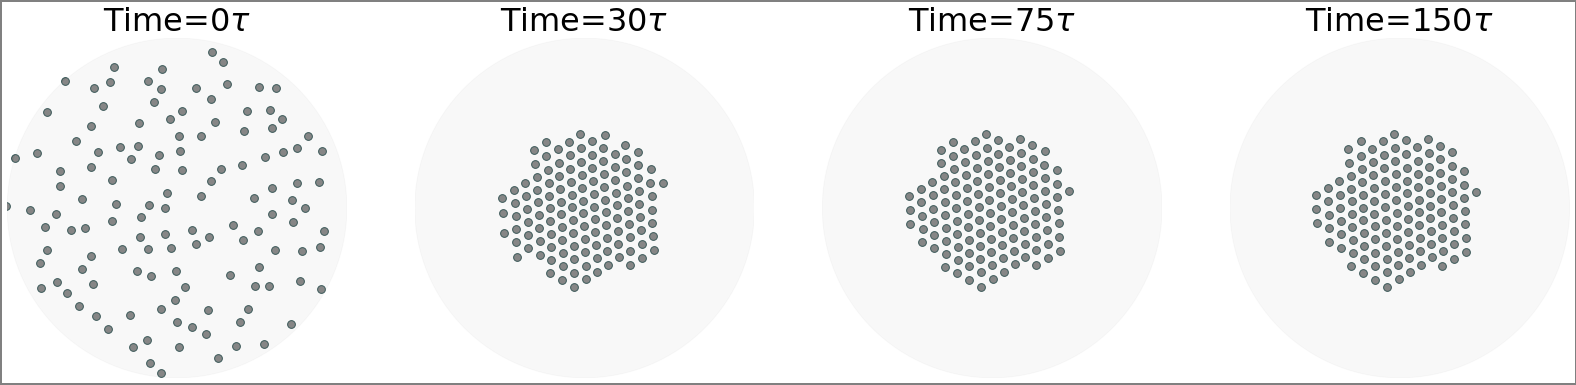

In [6]:
rbm = pystokes.interface.Rbm(radius=b, particles=Np, viscosity=eta)

force = pystokes.forceFields.Forces(particles=Np)

# simulate the resulting system
Tf, Npts = 150, 200
pystokes.utils.simulate(np.concatenate((r,p)), Tf,Npts,rhs,integrator='odeint', filename='crystallization')

# plot the data at specific time instants
pystokes.utils.plotConfigs(t=[1, 40, 100, 200], ms=60, tau=(Tf/Npts)/(b/vs), filename='crystallization')